## Q1) find the cities where startups have received funding maximum number of times.

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79

City which received funding maximum times is: Bangalore


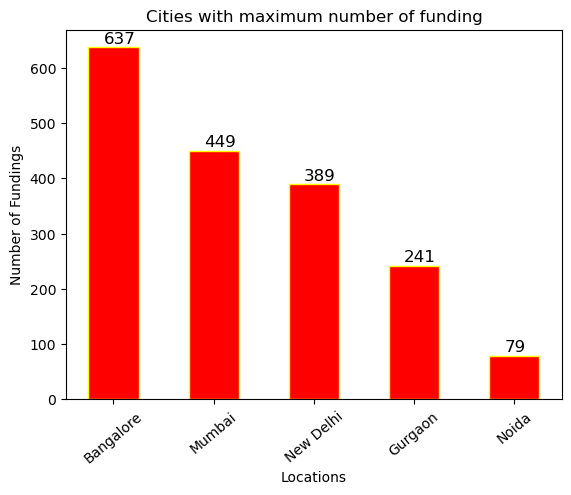

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")  #reading data from startup_funding.csv file
df = startup.copy()  #creating a copy of startup dataframe...

df.dropna(subset = ["CityLocation"],inplace = True)  #removing row's having nan's in city location column
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)  #replacing the wrong word with the correct one..
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

d1 = {}   #dictionary to maintain the number of fundings in the provided locations...

for i in df["CityLocation"]: #traversing through all the locations and maintaining the number of times the provided locations fetched...using if else..
    if "Bangalore" in i:
        d1["Bangalore"] = d1.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d1["Mumbai"] = d1.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d1["New Delhi"] = d1.get("New Delhi",0) + 1
    elif "Noida" in i:
        d1["Noida"] = d1.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d1["Gurgaon"] = d1.get("Gurgaon",0) + 1
        
cities = sorted(d1, key=d1.get , reverse=True)   #sorting the keys in reverse order(descending to aescending) according to the values...
fundings = []  

for i in cities:  #traversing through the cities...and created a new list of values...in sorted format 
    fundings.append(d1[i])
    
for i in range(len(cities)):
    print(cities[i],fundings[i])

for i in range(len(cities)): #labelling
    plt.text(i-0.1, fundings[i]+8, fundings[i], fontsize = 12)
print()
    
print('City which received funding maximum times is:',cities[0])

plt.bar(cities,fundings,width = 0.5,color = "red" , edgecolor = "yellow")  #ploting the bar graph....cities vs no of fundings..
plt.xlabel("Locations")   #labeling x-axis
plt.ylabel("Number of Fundings")  #labeling y_axis
plt.xticks(rotation = 40) #rotating names in x-axis
plt.title("Cities with maximum number of funding")
plt.show()

## Q2) Top 5 investors who have invested maximum number of times

1 ) Sequoia Capital 64
2 ) Accel Partners 53
3 ) Kalaari Capital 44
4 ) SAIF Partners 41
5 ) Indian Angel Network 40



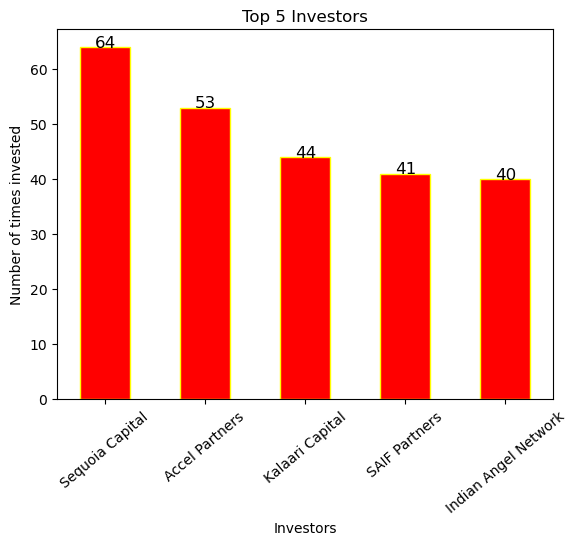

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
            
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
    

d1 = sorted(d, key=d.get , reverse=True)[0:5]#sorting the keys in reverse order(descending to ascending) according to the values...
investors=[]
investor_count=[]
for i in range(len(d1)):  #printing the top 5 investors...funded maximum number of times...
    print(i+1,")",d1[i],d.get(d1[i]))
    investors.append(d1[i])
    investor_count.append(d.get(d1[i]))
    
for i in range(len(cities)): #labelling
    plt.text(i-0.1,investor_count[i],investor_count[i], fontsize = 12)
print()

plt.bar(investors,investor_count,width = 0.5,color = "red" , edgecolor = "yellow")  #ploting the bar graph....cities vs no of fundings..
plt.xlabel("Investors")   #labeling x-axis
plt.ylabel("Number of times invested")  #labeling y_axis
plt.xticks(rotation = 40) #rotating names in x-axis
plt.title("Top 5 Investors")
plt.show()


## Q3) Top 5 investors who have invested in different number of startups.

Top 5 Investors are:
1 ) Sequoia Capital - 48
2 ) Accel Partners - 47
3 ) Kalaari Capital - 41
4 ) Indian Angel Network - 40
5 ) Blume Ventures - 36



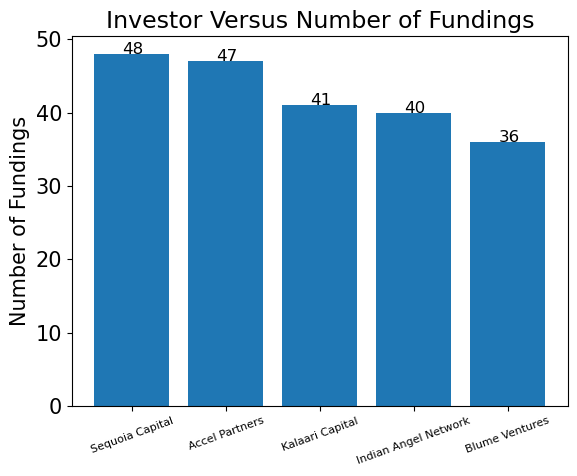

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8') 
#Data Cleaning
df.dropna(subset=['InvestorsName','StartupName'],inplace=True) 
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

#Taking investor name as key in the dictionary
#Value is a set of all startups that the investor has invested in 
#example d['Sequoia Capital']={'Oyo','Flipkart','Paytm'}

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if invest != "":
            if invest in d:
                s=d[invest] #Obtaining existing set of startups for the current investor
                s.add(startup[i]) #Adding new startup to current investor
                d[invest]=s   #Updating the startup set for current investor
            else:
                d[invest]={startup[i]}

#Replacing each investor name value in dictionary with the count of startups they have invested in
#eg if d['Sequoia Capital']={'Oyo','Flipkart','Paytm'}
# then d['Sequoia Capital']=3
for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

#Sorting in descending order

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(i+1,')',investor_name[i],'-',number_of_fundings[i])

for i in range(len(cities)): #labelling
    plt.text(i-0.1, number_of_fundings[i], number_of_fundings[i], fontsize = 12)
print()
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(fontsize=8,rotation=20)
plt.show()

## Q4) Top 5 investors who have invested in a different number of startups and their investment type is Crowd Funding or Seed Funding

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
1 ) Indian Angel Network - 33
2 ) Rajan Anandan - 23
3 ) LetsVenture - 16
4 ) Anupam Mittal - 16
5 ) Group of Angel Investors - 14



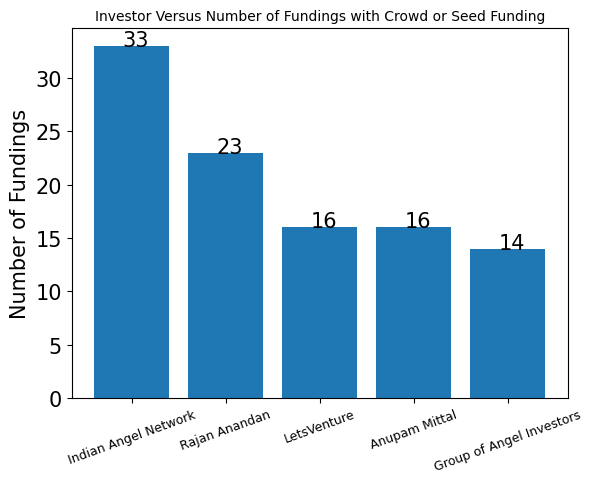

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
#DATA Cleaning
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)


#keeping only those rows having investment type seed funding and crowd funding 
df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

#Taking investor name as key in the dictionary
#Value is a set of all startups that the investor has invested in 
#example d['Sequoia Capital']={'Oyo','Flipkart','Paytm'}
d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest] #Obtaining existing set of startups for the current investor
                s.add(startup[i]) #Adding new startup to current investor
                d[invest]=s #Updating the startup set for current investor
            else:
                d[invest]={startup[i]}

#Replacing each investor name value in dictionary with the count of startups they have invested in
#eg if d['Sequoia Capital']={'Oyo','Flipkart','Paytm'}
# then d['Sequoia Capital']=3
for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

#Sorting in descending order
ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:')
for i in range(len(investor_name)):
    print(i+1,')',investor_name[i],'-',number_of_fundings[i])

for i in range(len(cities)): #labelling
    plt.text(i-0.1, number_of_fundings[i], number_of_fundings[i], fontsize = 15)
print()
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings with Crowd or Seed Funding investment',fontsize=10)
plt.yticks(fontsize=15)
plt.xticks(rotation=20,fontsize=9)
plt.show()

## Q5) Top 5 investors who have invested in a different number of startups and their investment type is Private Equity

Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital - 45
Accel Partners - 43
Kalaari Capital - 35
Blume Ventures - 27
SAIF Partners - 24



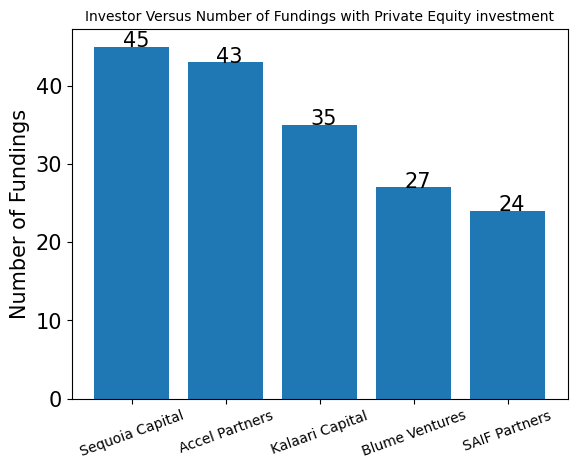

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[df.InvestmentType=='Private Equity']

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

#Taking investor name as key in the dictionary
#Value is a set of all startups that the investor has invested in 
#example d['Sequoia Capital']={'Oyo','Flipkart','Paytm'}
d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest] #Obtaining existing set of startups for the current investor
                s.add(startup[i]) #Adding new startup to current investor
                d[invest]=s  #Updating the startup set for current investor
            else:
                d[invest]={startup[i]}

#Replacing each investor name value in dictionary with the count of startups they have invested in
#eg if d['Sequoia Capital']={'Oyo','Flipkart','Paytm'}
# then d['Sequoia Capital']=3                
for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])

for i in range(len(cities)): #labelling
    plt.text(i-0.1, number_of_fundings[i], number_of_fundings[i], fontsize = 15)
print()
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings with Private Equity investment',fontsize=10)
plt.yticks(fontsize=15)
plt.xticks(rotation=20,fontsize=10)
plt.show()